# 1. Business Understanding
- Forecasting transactions
- Likely regression
- Data for 3 years
- Advised data quality is okay 


## 2. Data Understanding

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv('regression.csv')

In [3]:
df.head()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
0,2019,Jan,CC100,1000000,Product Sales,Revenue,1344.051
1,2019,Jan,CC100,1000001,Licensing Revenue,Revenue,480.968
2,2019,Jan,CC100,1000002,Service Revenue,Revenue,650.820
3,2019,Jan,CC100,1000004,Fee Revenue,Revenue,339.360
4,2019,Jan,CC100,2000000,Cost of Good Sold,Expense,1125.328


In [4]:
df.tail()

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount
4207,2021,Dec,CC302,2000005,Purchases,Expense,698.121
4208,2021,Dec,CC302,3000000,Cash at Bank,Asset,-282.056
4209,2021,Dec,CC302,3000001,Inventory,Asset,537.478
4210,2021,Dec,CC302,3000002,Accounts Receivable,Asset,1152.680
4211,2021,Dec,CC302,4000001,Accounts Payable,Liability,-1020.000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year                 4212 non-null   int64  
 1   Month                4212 non-null   object 
 2   Cost Centre          4212 non-null   object 
 3   Account              4212 non-null   int64  
 4   Account Description  4212 non-null   object 
 5   Account Type         4212 non-null   object 
 6   Amount               4212 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 230.5+ KB


In [6]:
for col in df.columns:
    print(col,len(df[col].unique()), df[col].unique())

Year 3 [2019 2020 2021]
Month 12 ['Jan' 'Feb' 'Mar' 'Apr' 'May' 'Jun' 'Jul' 'Aug' 'Sep' 'Oct' 'Nov' 'Dec']
Cost Centre 9 ['CC100' 'CC101' 'CC102' 'CC200' 'CC201' 'CC202' 'CC300' 'CC301' 'CC302']
Account 13 [1000000 1000001 1000002 1000004 2000000 2000001 2000002 2000003 2000005
 3000000 3000001 3000002 4000001]
Account Description 13 ['Product Sales' 'Licensing Revenue' 'Service Revenue' 'Fee Revenue'
 'Cost of Good Sold' 'Staff Expenses' 'Technology Expenses'
 'Property Expenses' 'Purchases' 'Cash at Bank' 'Inventory'
 'Accounts Receivable' 'Accounts Payable']
Account Type 4 ['Revenue' 'Expense' 'Asset' 'Liability']
Amount 3956 [1344.051  480.968  650.82  ... -282.056  537.478 1152.68 ]


In [7]:
df.describe()

,Year,Account,Amount
count,4212.000000,4.212000e+03,4212.000000
mean,2020.000000,2.076925e+06,476.470421
std,0.816594,9.167528e+05,477.296234
min,2019.000000,1.000000e+06,-1020.000000
25%,2019.000000,1.000004e+06,268.044500
50%,2020.000000,2.000002e+06,512.998500
75%,2021.000000,3.000000e+06,755.960250
max,2021.000000,4.000001e+06,2378.880000


In [8]:
df.dtypes

Year                     int64
Month                   object
Cost Centre             object
Account                  int64
Account Description     object
Account Type            object
Amount                 float64
dtype: object

In [9]:
from matplotlib import pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Account Type ViolinPlot')

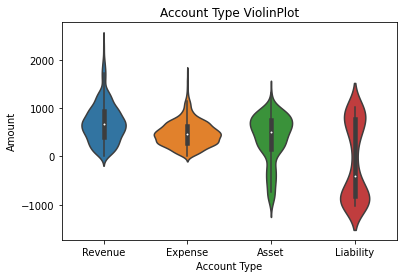

In [10]:

sns.violinplot(x='Account Type', y='Amount',data=df).set_title('Account Type ViolinPlot')


<AxesSubplot:xlabel='Account Description', ylabel='Amount'>

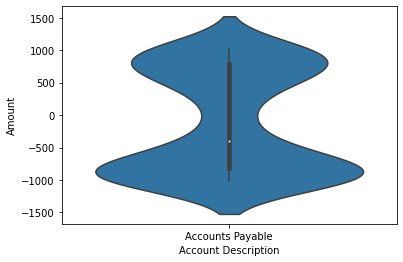

In [11]:
sns.violinplot(x='Account Description',y='Amount',data=df[df['Account Type']=='Liability'] )

<AxesSubplot:xlabel='Account Description', ylabel='Amount'>

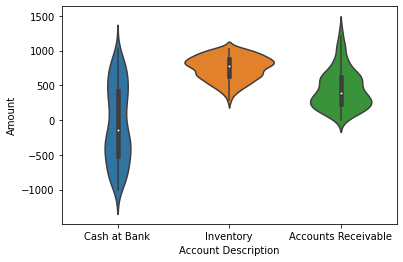

In [12]:

sns.violinplot(x='Account Description',y='Amount',data=df[df['Account Type']=='Asset'])

## Review Trends

In [13]:
monthmap = {
    'Jan':1,
    'Feb':2,
    'Mar':3,
    'Apr':4,
    'May':5,
    'Jun':6,
    'Jul':7,
    'Aug':8,
    'Sep':9,
    'Oct':10,
    'Nov':11,
    'Dec':12,
}

In [14]:
df['Period']=df['Month'].apply(lambda x: monthmap[x])

In [15]:
df['Day']=1

In [16]:
df['Date']=df['Year'].astype(str)+'-'+df['Period'].astype(str)+'-'+df['Day'].astype(str)

In [17]:
df['Date']= pd.to_datetime(df['Date'])

<AxesSubplot:xlabel='Date', ylabel='Amount'>

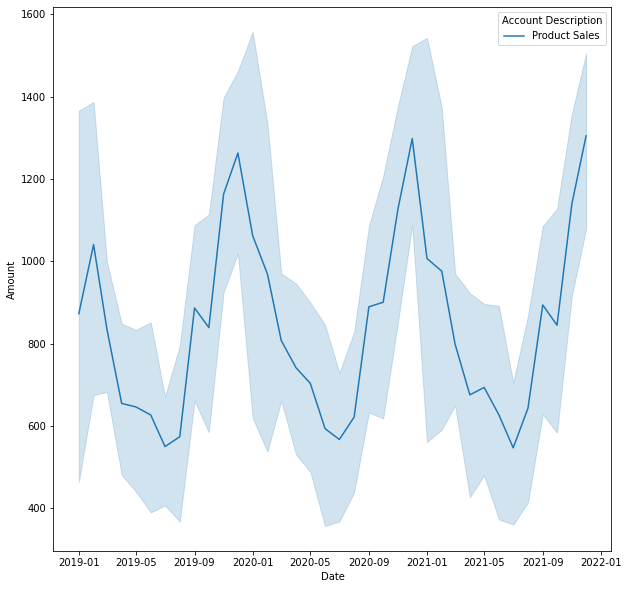

In [18]:
plt.figure(figsize=(10,10))
sns.lineplot(x='Date',y='Amount',hue='Account Description',data=df[df['Account Description']=='Product Sales'])

<AxesSubplot:xlabel='Date', ylabel='Amount'>

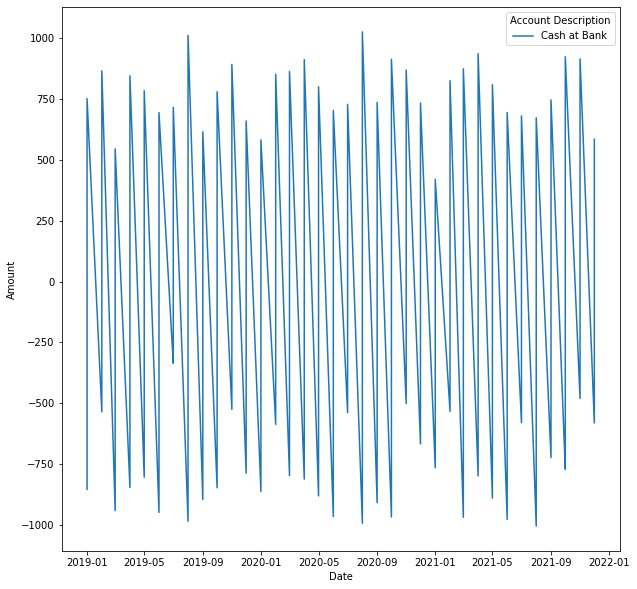

In [19]:
plt.figure(figsize=(10,10))
sns.lineplot(x='Date',y='Amount',hue='Account Description',estimator=None,data=df[df['Account Description']=='Cash at Bank'])

## Correlation

In [20]:
df.corr()

,Year,Account,Amount,Period,Day
Year,1.000000e+00,-5.466737e-15,0.014750,-5.695624e-13,NaN
Account,-5.466737e-15,1.000000e+00,-0.417946,2.315721e-16,NaN
Amount,1.475040e-02,-4.179456e-01,1.000000,2.447256e-02,NaN
Period,-5.695624e-13,2.315721e-16,0.024473,1.000000e+00,NaN
Day,NaN,NaN,NaN,NaN,NaN


In [21]:
pd.get_dummies(df['Account'])

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0,0,0,0,0,0,0
4,0,0,0,0,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0,0,0,0,0,0,0,0,1,0,0,0,0
4208,0,0,0,0,0,0,0,0,0,1,0,0,0
4209,0,0,0,0,0,0,0,0,0,0,1,0,0
4210,0,0,0,0,0,0,0,0,0,0,0,1,0


In [22]:
corrdict={}
for key, row in df.join(pd.get_dummies(df['Account'])).iterrows():
    corrdict[key]={int(row['Account']):row['Amount']}

In [23]:
corrdf=pd.DataFrame.from_dict(corrdict).T.fillna(0)

In [24]:
corrdf

,1000000,1000001,1000002,1000004,2000000,2000001,2000002,2000003,2000005,3000000,3000001,3000002,4000001
0,1344.051,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
1,0.000,480.968,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
2,0.000,0.000,650.82,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
3,0.000,0.000,0.00,339.36,0.000,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
4,0.000,0.000,0.00,0.00,1125.328,0.0,0.0,0.0,0.000,0.000,0.000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,698.121,0.000,0.000,0.00,0.0
4208,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,-282.056,0.000,0.00,0.0
4209,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,537.478,0.00,0.0
4210,0.000,0.000,0.00,0.00,0.000,0.0,0.0,0.0,0.000,0.000,0.000,1152.68,0.0


<AxesSubplot:>

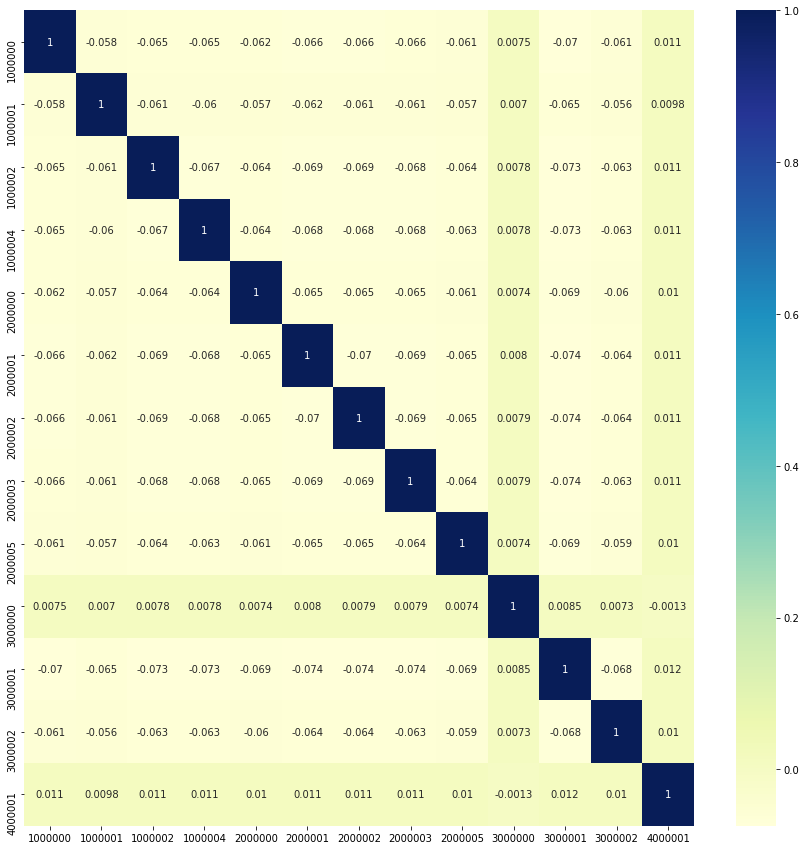

In [25]:
plt.figure(figsize=(15,15))
sns.heatmap(corrdf.corr(), cmap="YlGnBu",annot=True)

In [26]:
df[df['Account']==4000001]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
12,2019,Jan,CC100,4000001,Accounts Payable,Liability,980.0,1,1,2019-01-01
25,2019,Jan,CC101,4000001,Accounts Payable,Liability,200.0,1,1,2019-01-01
38,2019,Jan,CC102,4000001,Accounts Payable,Liability,-980.0,1,1,2019-01-01
51,2019,Jan,CC200,4000001,Accounts Payable,Liability,980.0,1,1,2019-01-01
64,2019,Jan,CC201,4000001,Accounts Payable,Liability,784.0,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4159,2021,Dec,CC201,4000001,Accounts Payable,Liability,804.0,12,1,2021-12-01
4172,2021,Dec,CC202,4000001,Accounts Payable,Liability,-1018.0,12,1,2021-12-01
4185,2021,Dec,CC300,4000001,Accounts Payable,Liability,-1020.0,12,1,2021-12-01
4198,2021,Dec,CC301,4000001,Accounts Payable,Liability,-612.0,12,1,2021-12-01


In [27]:
df[df['Account']==3000000]

,Year,Month,Cost Centre,Account,Account Description,Account Type,Amount,Period,Day,Date
9,2019,Jan,CC100,3000000,Cash at Bank,Asset,476.713,1,1,2019-01-01
22,2019,Jan,CC101,3000000,Cash at Bank,Asset,464.197,1,1,2019-01-01
35,2019,Jan,CC102,3000000,Cash at Bank,Asset,-296.261,1,1,2019-01-01
48,2019,Jan,CC200,3000000,Cash at Bank,Asset,750.000,1,1,2019-01-01
61,2019,Jan,CC201,3000000,Cash at Bank,Asset,187.647,1,1,2019-01-01
...,...,...,...,...,...,...,...,...,...,...
4156,2021,Dec,CC201,3000000,Cash at Bank,Asset,413.616,12,1,2021-12-01
4169,2021,Dec,CC202,3000000,Cash at Bank,Asset,375.657,12,1,2021-12-01
4182,2021,Dec,CC300,3000000,Cash at Bank,Asset,-492.546,12,1,2021-12-01
4195,2021,Dec,CC301,3000000,Cash at Bank,Asset,-579.986,12,1,2021-12-01


## 3. Data Preparation

In [28]:
import numpy as np

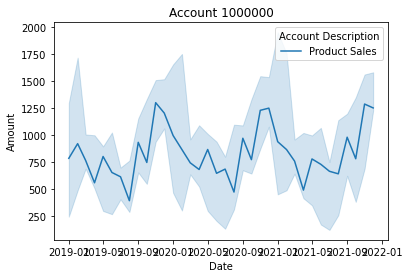

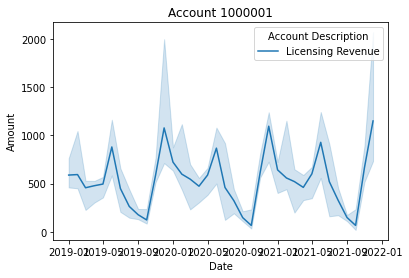

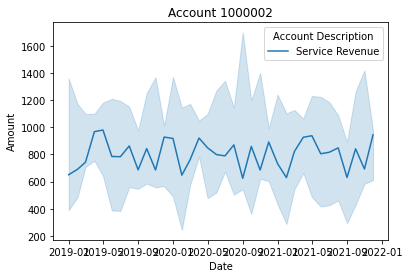

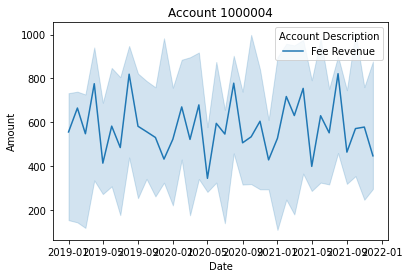

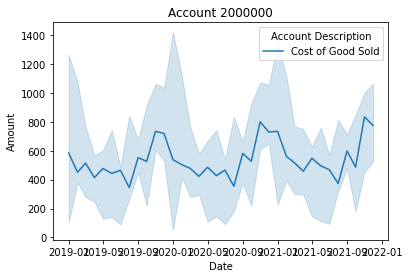

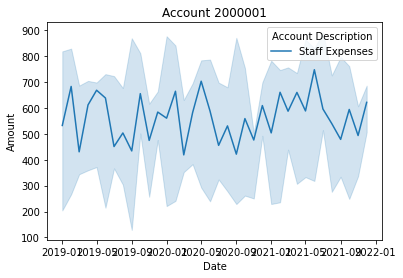

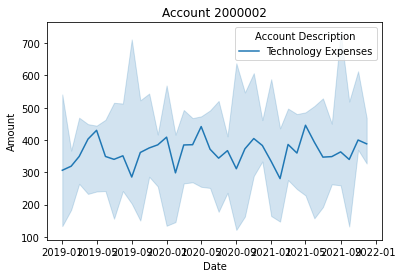

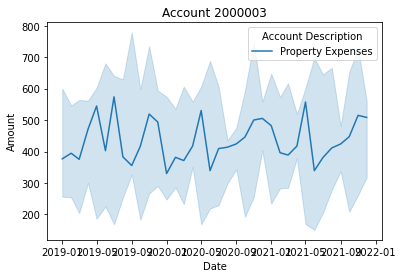

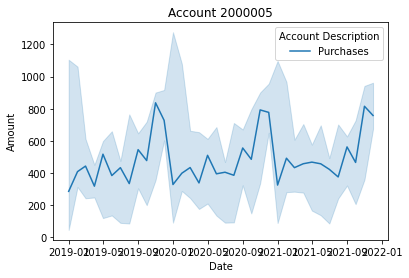

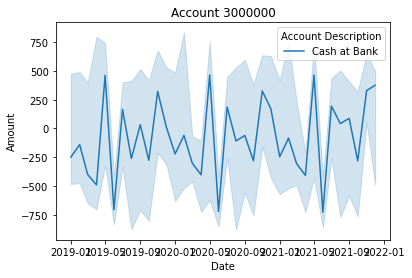

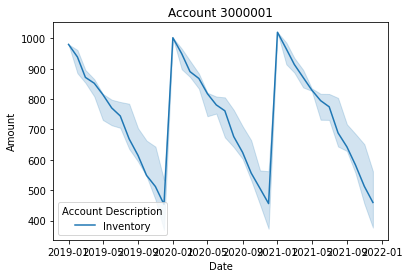

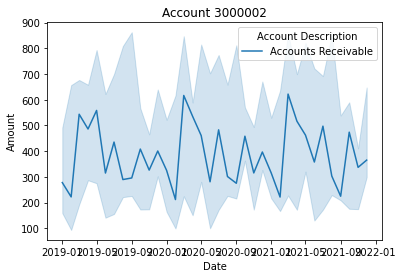

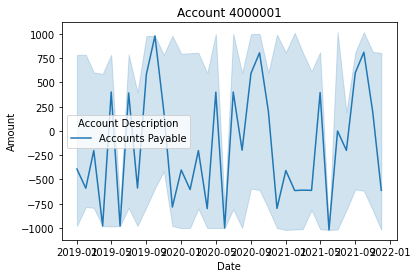

In [29]:
for account in df['Account'].unique():
    sns.lineplot(x='Date',y='Amount',hue='Account Description',estimator=np.median, data=df[df['Account']==account]).set_title('Account '+str(account))
    plt.show()

In [30]:
#df =df[df['Account']!=3000001]

In [31]:
df['Account'].unique()

array([1000000, 1000001, 1000002, 1000004, 2000000, 2000001, 2000002,
       2000003, 2000005, 3000000, 3000001, 3000002, 4000001], dtype=int64)

## Convert Fields to Correct Data Type

In [32]:
df.dtypes

Year                            int64
Month                          object
Cost Centre                    object
Account                         int64
Account Description            object
Account Type                   object
Amount                        float64
Period                          int64
Day                             int64
Date                   datetime64[ns]
dtype: object

In [33]:
df['Account']='ACC'+df['Account'].astype(str)

In [34]:
df['Year']=df['Year'].astype(str)

## Drop Analysis Fields

In [35]:
df.drop(['Period','Day','Date'],axis=1,inplace=True)

In [36]:
for account in df['Account'].unique():
    print(df[df['Account']==account]['Account Description'].unique())

['Product Sales']
['Licensing Revenue']
['Service Revenue']
['Fee Revenue']
['Cost of Good Sold']
['Staff Expenses']
['Technology Expenses']
['Property Expenses']
['Purchases']
['Cash at Bank']
['Inventory']
['Accounts Receivable']
['Accounts Payable']


In [37]:
df.drop(['Account Description'],axis=1,inplace=True)

In [38]:
df.head()

,Year,Month,Cost Centre,Account,Account Type,Amount
0,2019,Jan,CC100,ACC1000000,Revenue,1344.051
1,2019,Jan,CC100,ACC1000001,Revenue,480.968
2,2019,Jan,CC100,ACC1000002,Revenue,650.820
3,2019,Jan,CC100,ACC1000004,Revenue,339.360
4,2019,Jan,CC100,ACC2000000,Expense,1125.328


In [39]:
pd.get_dummies(df)

,Amount,Year_2019,Year_2020,Year_2021,Month_Apr,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_Jul,...,Account_ACC2000003,Account_ACC2000005,Account_ACC3000000,Account_ACC3000001,Account_ACC3000002,Account_ACC4000001,Account Type_Asset,Account Type_Expense,Account Type_Liability,Account Type_Revenue
0,1344.051,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,480.968,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
2,650.820,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,339.360,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1125.328,1,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4207,698.121,0,0,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
4208,-282.056,0,0,1,0,0,1,0,0,0,...,0,0,1,0,0,0,1,0,0,0
4209,537.478,0,0,1,0,0,1,0,0,0,...,0,0,0,1,0,0,1,0,0,0
4210,1152.680,0,0,1,0,0,1,0,0,0,...,0,0,0,0,1,0,1,0,0,0


In [40]:
df=pd.get_dummies(df)

In [41]:
df.dtypes

Amount                    float64
Year_2019                   uint8
Year_2020                   uint8
Year_2021                   uint8
Month_Apr                   uint8
Month_Aug                   uint8
Month_Dec                   uint8
Month_Feb                   uint8
Month_Jan                   uint8
Month_Jul                   uint8
Month_Jun                   uint8
Month_Mar                   uint8
Month_May                   uint8
Month_Nov                   uint8
Month_Oct                   uint8
Month_Sep                   uint8
Cost Centre_CC100           uint8
Cost Centre_CC101           uint8
Cost Centre_CC102           uint8
Cost Centre_CC200           uint8
Cost Centre_CC201           uint8
Cost Centre_CC202           uint8
Cost Centre_CC300           uint8
Cost Centre_CC301           uint8
Cost Centre_CC302           uint8
Account_ACC1000000          uint8
Account_ACC1000001          uint8
Account_ACC1000002          uint8
Account_ACC1000004          uint8
Account_ACC200

## 4. Modelling

### 4.1 Select the dependent and the independent variables

In [42]:
x =  df.drop(['Amount'],axis=1)
y = df['Amount']

### 4.3 split the dataset into train and test

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=1234)

In [45]:
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(2948, 41) (1264, 41) (2948,) (1264,)


## 4.4 Building up different models

In [46]:
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

In [47]:
pipelines = {
    'rf':make_pipeline(RandomForestRegressor(random_state=1234)),
    'gb':make_pipeline(GradientBoostingRegressor(random_state=1234)),
    'ridge':make_pipeline(Ridge(random_state=1234)),
    'lasso':make_pipeline(Lasso(random_state=1234)),
    'enet':make_pipeline(ElasticNet(random_state=1234))
}

In [48]:
Ridge().get_params()

{'alpha': 1.0,
 'copy_X': True,
 'fit_intercept': True,
 'max_iter': None,
 'normalize': False,
 'random_state': None,
 'solver': 'auto',
 'tol': 0.001}

In [49]:
hypergrid = {
    'rf':{
        'randomforestregressor__min_samples_split':[2,4,6],
        'randomforestregressor__min_samples_leaf':[1,2,3],
    },
    'gb':{
        'gradientboostingregressor__alpha':[1e-3,5e-3,1e-2,5e-2,0.1,0.5,0.99]
    },
    'ridge':{
        'ridge__alpha':[1e-3,5e-3,1e-2,5e-2,0.1,0.5,0.99]
    },
    'lasso':{
        'lasso__alpha':[1e-3,5e-3,1e-2,5e-2,0.1,0.5,0.99]
    },
    'enet':{
        'elasticnet__alpha':[1e-3,5e-3,1e-2,5e-2,0.1,0.5,0.99]
    }
}

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.exceptions import NotFittedError

In [54]:
fit_models = {}
for algo, pipeline in pipelines.items():
    model = GridSearchCV(pipeline,hypergrid[algo],cv=10,n_jobs=-1)
    try:
        print('Starting training for {}.'.format(algo))
        model.fit(X_train,y_train)
        fit_models[algo]=model
        print('{}. has been successfully fit.' .format(algo))

    except NotFittedError as e:
        print(repr(e))

Starting training for rf.
rf. has been successfully fit.
Starting training for gb.
gb. has been successfully fit.
Starting training for ridge.
ridge. has been successfully fit.
Starting training for lasso.
lasso. has been successfully fit.
Starting training for enet.
enet. has been successfully fit.


## 5. Evaluation

In [55]:
from sklearn.metrics  import r2_score, mean_absolute_error

In [56]:
for algo,model in fit_models.items():
    y_pre = model.predict(X_test)
    print('{} scores - R2: {} MSE: {}'.format(algo,r2_score(y_test,y_pre),mean_absolute_error(y_test,y_pre)))

rf scores - R2: 0.9342019743760693 MSE: 76.33576577531646
gb scores - R2: 0.6353516501682552 MSE: 190.8419509203904
ridge scores - R2: 0.5093625023110631 MSE: 224.88706328103046
lasso scores - R2: 0.509750861393047 MSE: 224.4782275114179
enet scores - R2: 0.5086617173444186 MSE: 225.02988780517327


c:\users\berme\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\users\berme\appdata\local\programs\python\python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Amount'>

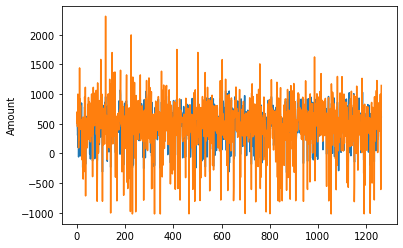

In [59]:
sns.lineplot(np.arange(0,len(y_pre)),y_pre)
sns.lineplot(np.arange(0,len(y_pre)),y_test)